# Problem Statement: 

BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.
The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

# Hypothesis Generation:

Item_Weight is a numerical value hence it can affect the sales in that particular outlet

Sales may be dependent on the Item_Fat_Content.

More Visibilty may be due to higher price of the product to increase sales in turn increase profit.

Item_Type - perishable items may be sold frequently hence more sales .

Higher the MRP more the sales

Outlets established earlier may have higher sales

More the outlet size more would be the sales

Location of the stores may affect the sales .

Supermarket's type may also affect the Outlet sales.

# Loading Packages and Data:

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import metrics
# from sklearn.metrics import mean_absolute_error as MAE
# from sklearn.metrics import mean_squared_error as MSE
# from sklearn.metrics import r2_score as R2
# from sklearn.model_selection  import cross_val_score as CVS


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
import gc
import pickle
from xgboost import XGBRegressor
from matplotlib.pylab import rcParams

In [2]:
train_data=pd.read_csv('C:/Users/dell/Data-Analyst-Team-Code-TCS81H/mini-project-rimsha-salahuddin/Train.csv')
test_data=pd.read_csv('C:/Users/dell/Data-Analyst-Team-Code-TCS81H/mini-project-rimsha-salahuddin/Test.csv')

# Data Structure and Content:

In [3]:
train_data.shape

(8523, 12)

In [4]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Training data contains the **target variable -->Item_Outlet_Sales**

In [6]:
test_data.shape

(5681, 11)

In [7]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [8]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Test data does not contain the **target variable**

# Exploratory Data Analysis:

In [9]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Numerical Variables:
**Item_Weight,
Item_Visibility,
Item_MRP,
Outlet_Establisment_Year,
Item_Outlet_Sales**

Categorical Varaibles:
**Item_Identifier,
Item_Fat_Content,
Item_Type,
Outlet_Identifier,
Outlet_Size,
Outlet_Location_Type,
Outlet_Type**


In [12]:
#We can see that the fat content present here
#we have low fat labelled as LF and low fat , also Regular has an alias of reg , therefore to avoid this we need to make all the same 

train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
train_data['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
train_data['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
train_data['Item_Fat_Content'].replace('reg','Regular',inplace=True)

# Missing values Treatment:

In [15]:
train_data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:>

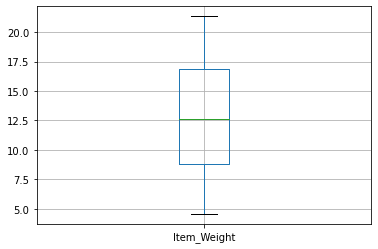

In [17]:
train_data.boxplot(column=['Item_Weight'])

As we can see there are no outliers from the box plot which leads to the conclusion that the missing values can be replaced with the mean

In [18]:
#Imputing of the missing values in the Item_Weight column
mean1 = train_data['Item_Weight'].mean()
train_data['Item_Weight'].replace(np.nan,mean1,inplace=True)

In [19]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We have filled the missing values in the **Item_Weight** column

Now we will fill the missing vale in **Outlet_Size** which is a categorical variable we replace it with mode 


In [20]:
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [21]:
train_data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Therefore all the missing values have been removed in the training dataset.

In [22]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Check whether the null values appear in the test dataset 

In [23]:
test_data.isnull().sum() 

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [24]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## Imputing missing values in the test dataset

In [25]:
test_data['Item_Weight'].fillna(value=test_data['Item_Weight'].mean(),inplace=True)
test_data['Outlet_Size'].fillna(value='Unavailable',inplace=True)

In [26]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Univariate Analysis:

In [27]:
train_data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [28]:
train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:>

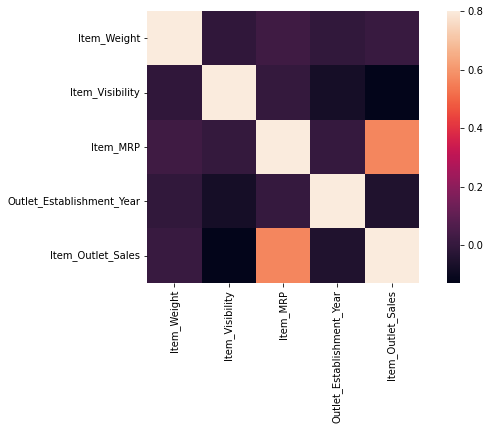

In [29]:
ax=plt.subplots(figsize=(10,5))
sns.heatmap(train_data.corr(),vmax=0.8,square=True)

<AxesSubplot:>

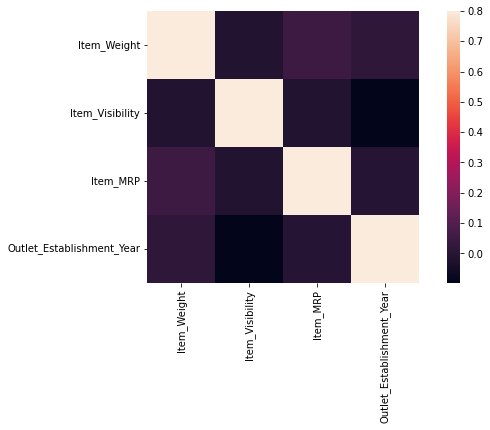

In [30]:
ax=plt.subplots(figsize=(10,5))
sns.heatmap(test_data.corr(),vmax=0.8,square=True)

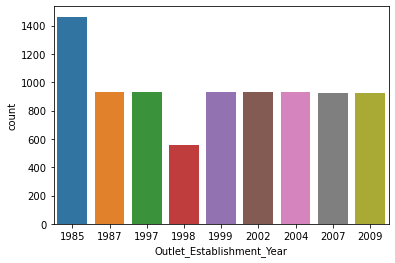

In [31]:
sns.countplot(x='Outlet_Establishment_Year', data=train_data)
plt.show()
#From this we can see there are a lot of stores established in the year 1985 and lowest in 1998. And the rest remain nearly same

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

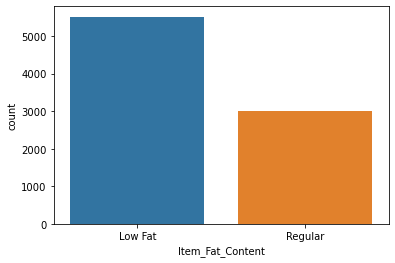

In [32]:
sns.countplot(x="Item_Fat_Content",data=train_data)
#As we identified that this had many alias names we changed and grouped them (done in the EDA part

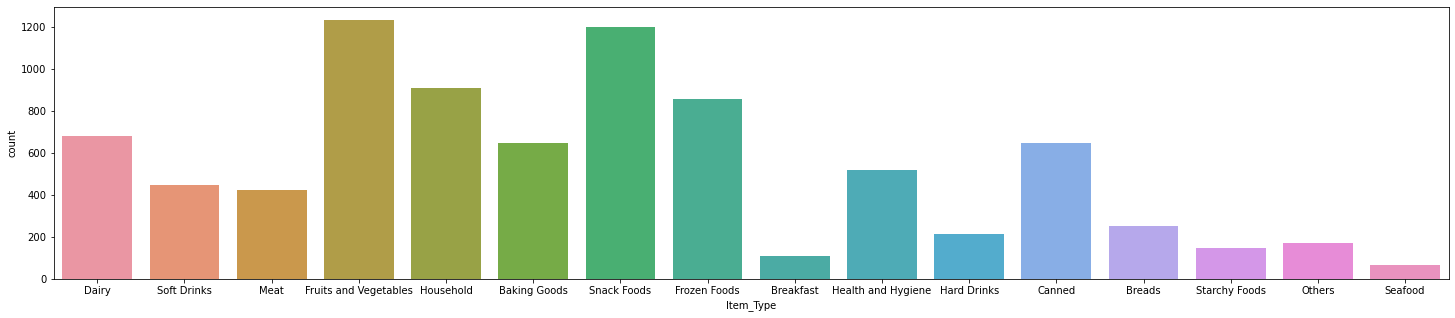

In [33]:
plt.figure(figsize=(25,5))
sns.countplot(x="Item_Type",data=train_data)
plt.show()
#From this we can coclude that the Fruits and vegetables , Snack foods constitute majority

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

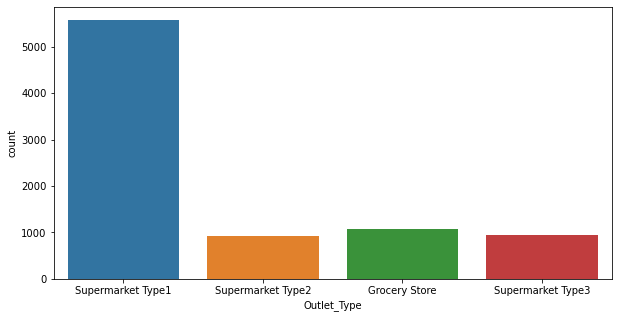

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outlet_Type",data=train_data)
#from this we can see that the Supermarket type 1 has most of the branches established

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

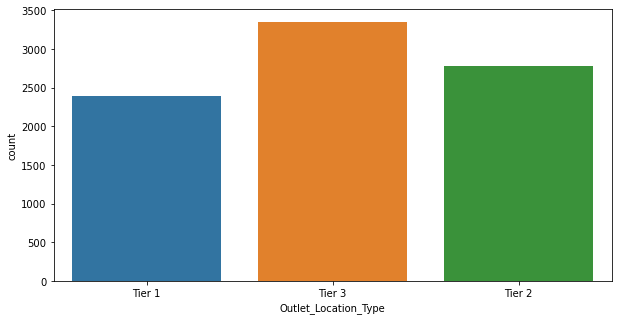

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outlet_Location_Type",data=train_data)
#tier 3 outlets are the more dominant among the location type followed by tier 2

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

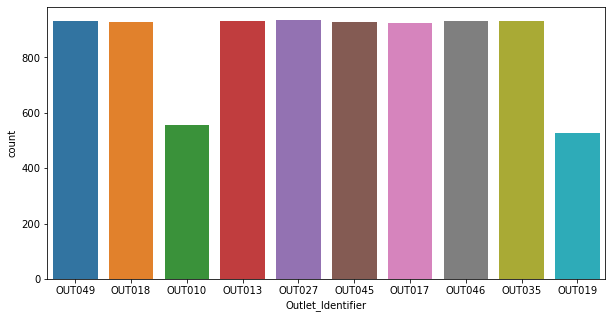

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outlet_Identifier",data=train_data)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

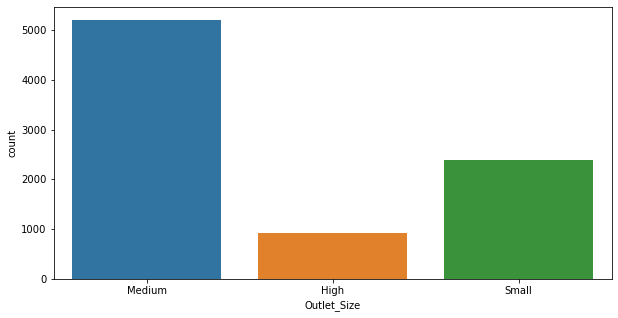

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outlet_Size",data=train_data)
#as we can see that the size of the outlet is majority of the outlets are of medium size.

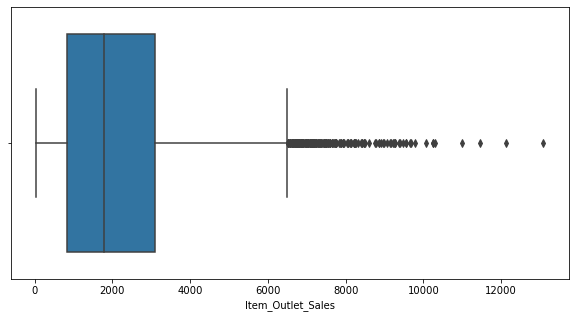

In [38]:
#From this we come to know that Item outlet sales contains outliers
#therefore we need to remove these outliers
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Item_Outlet_Sales', data = train_data);

In [39]:
def removeoutliers(df,column):
  Q3=df[column].quantile(0.75)
  Q1=df[column].quantile(0.25)
  IQR=Q3-Q1
  upper=Q3+(1.5*IQR)
  lower=Q1-(1.5*IQR)
  df=df[(df[column]>lower)&(df[column]<upper)]
  return df

In [40]:
#We have removed the outliers in the Item_Outlet_sales column
train_data=removeoutliers(train_data,'Item_Outlet_Sales')

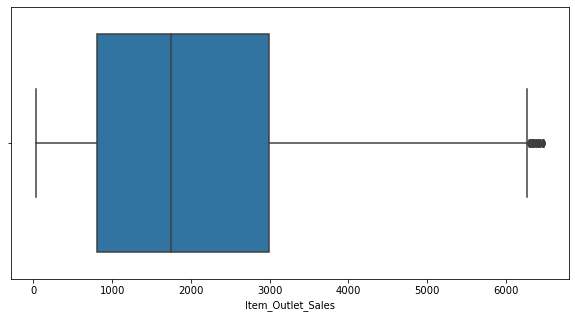

In [41]:
#After removal of outliers
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Item_Outlet_Sales', data = train_data);

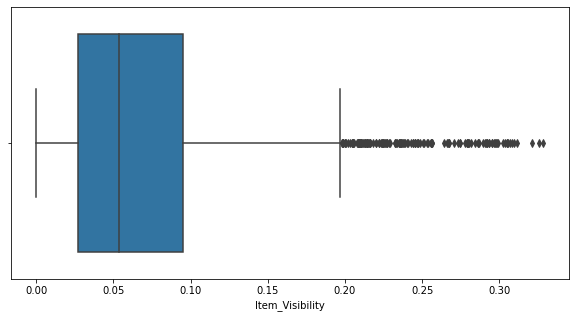

In [42]:
#We can see that the visibility also contains outliers and should be remove as above
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Item_Visibility', data = train_data);

In [43]:
train_data=removeoutliers(train_data,'Item_Visibility')

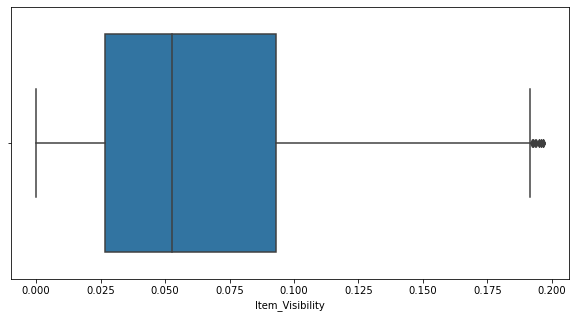

In [44]:
#after reoving outliers from Item_Visibility
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Item_Visibility', data = train_data);

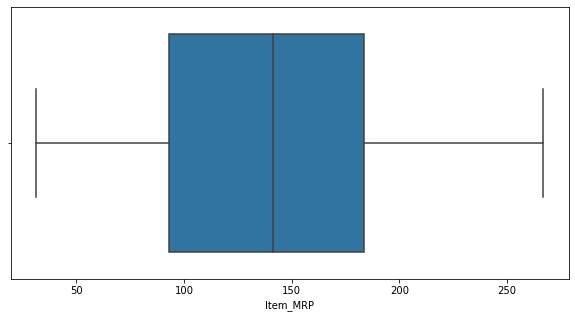

In [45]:
#No outliers are present
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Item_MRP', data = train_data);

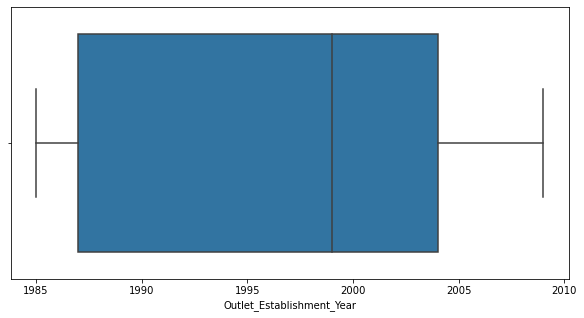

In [46]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Outlet_Establishment_Year', data = train_data);

# Bivariate Analysis:

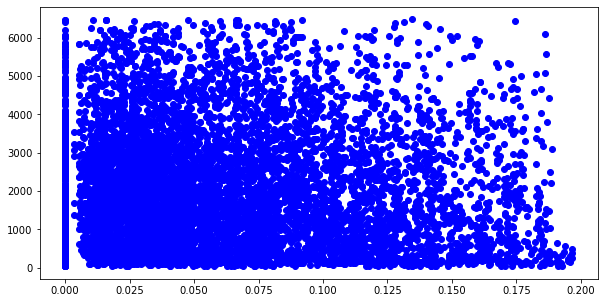

In [47]:
plt.figure(figsize =(10,5))
plt.scatter(train_data['Item_Visibility'], train_data['Item_Outlet_Sales'],c='blue')
#There is no linear relationship between these 2 variables

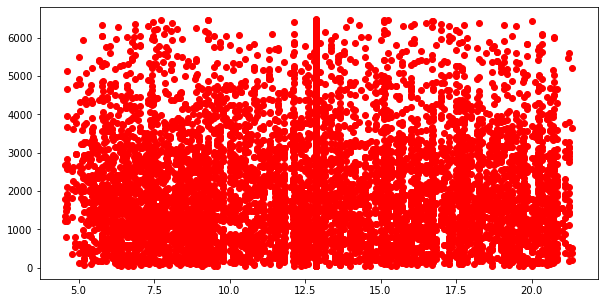

In [48]:
plt.figure(figsize =(10,5))
plt.scatter(train_data['Item_Weight'], train_data['Item_Outlet_Sales'],c='red')
#similarly there is no linear relationship between these 2 varaibles

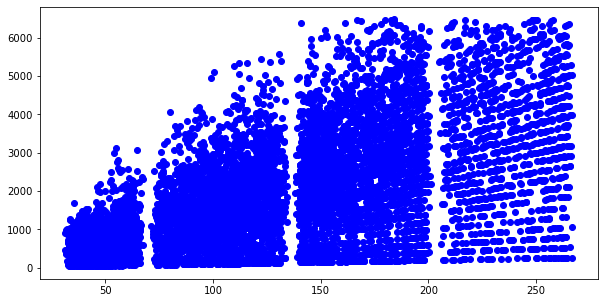

In [49]:
plt.figure(figsize =(10,5))
plt.scatter(train_data['Item_MRP'], train_data['Item_Outlet_Sales'],c='blue')
#somesort of a positive linear relationship exits here and due to the large amount of data we aren't able to tell correctly

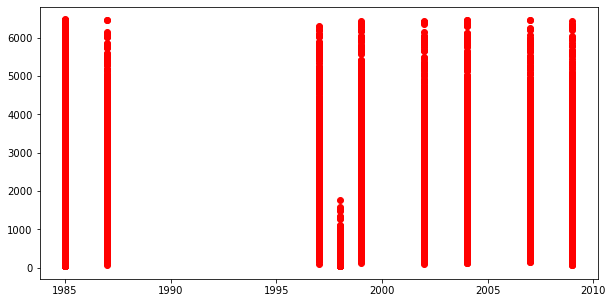

In [50]:
plt.figure(figsize =(10,5))
plt.scatter(train_data['Outlet_Establishment_Year'], train_data['Item_Outlet_Sales'],c='red')

# Encoding Categorical Variables:

## Label Encoding:

In [51]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [52]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [53]:
train_data['Item_Fat_Content'] = encoder.fit_transform(train_data['Item_Fat_Content'])

train_data['Item_Type'] = encoder.fit_transform(train_data['Item_Type'])

train_data['Outlet_Identifier'] = encoder.fit_transform(train_data['Outlet_Identifier'])

train_data['Outlet_Size'] = encoder.fit_transform(train_data['Outlet_Size'])

train_data['Outlet_Location_Type'] = encoder.fit_transform(train_data['Outlet_Location_Type'])

train_data['Outlet_Type'] = encoder.fit_transform(train_data['Outlet_Type'])

In [54]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,NCD19,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,FDS36,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,NCJ29,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,FDN46,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [55]:
X = train_data.drop(columns='Item_Outlet_Sales', axis=1)
y = train_data['Item_Outlet_Sales']

In [56]:
print(X)

     Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300                 0         0.016047   
1              DRC01        5.920                 1         0.019278   
2              FDN15       17.500                 0         0.016760   
3              FDX07       19.200                 1         0.000000   
4              NCD19        8.930                 0         0.000000   
...              ...          ...               ...              ...   
8518           FDF22        6.865                 0         0.056783   
8519           FDS36        8.380                 1         0.046982   
8520           NCJ29       10.600                 0         0.035186   
8521           FDN46        7.210                 1         0.145221   
8522           DRG01       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9                

In [57]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8196, dtype: float64


## One Hot Encoding:

In [58]:
train_item_type = pd.get_dummies(train_data['Item_Type'])
train_item_fat_content = pd.get_dummies(train_data['Item_Fat_Content'])
train_outlet_size = pd.get_dummies(train_data['Outlet_Size'])
train_outlet_location_type = pd.get_dummies(train_data['Outlet_Location_Type'])
train_output_type = pd.get_dummies(train_data['Outlet_Type'])

test_item_type = pd.get_dummies(test_data['Item_Type'])
test_item_fat_content = pd.get_dummies(test_data['Item_Fat_Content'])
test_outlet_size = pd.get_dummies(test_data['Outlet_Size'])
test_outlet_location_type = pd.get_dummies(test_data['Outlet_Location_Type'])
test_output_type = pd.get_dummies(test_data['Outlet_Type'])

In [59]:
train=train_data
train=pd.concat([train,train_item_fat_content,train_item_type,train_outlet_size,train_outlet_location_type,train_output_type],axis=1)
train.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],axis=1,inplace=True)
test=test_data
test=pd.concat([test,test_item_fat_content,test_item_type,test_outlet_size,test_outlet_location_type,test_output_type],axis=1)
test.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],axis=1,inplace=True)

In [60]:
x=train.drop(['Item_Outlet_Sales'],axis=1)
y=train['Item_Outlet_Sales']
x_test=test

# Feature Scaling:

In [61]:
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

x_test=sc_x.fit_transform(x_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# Modeling:

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.15,random_state=42)

## Linear Regression:

In [63]:
from sklearn.linear_model import LinearRegression
lm =LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [64]:
predictions=lm.predict(x_val)

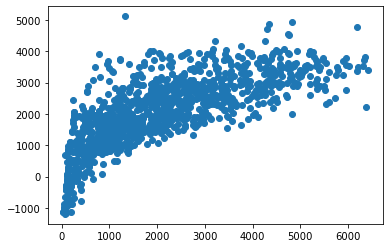

In [65]:
plt.scatter(y_val,predictions)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

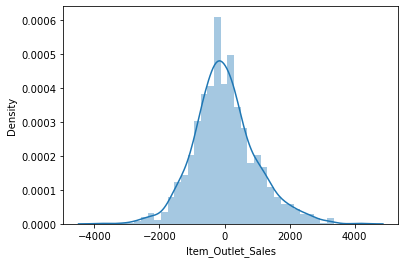

In [66]:
sns.distplot((y_val-predictions))

In [67]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions))

Mean Absolute Error:  732.9503268588907
Mean Squared Error:  931653.6790630961
Root Mean Squared Error:  965.2220879482069
Explained Variance Score:  0.5599488587935331


## Lasso Regressor (Regularized Linear Regression)
In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

In [68]:
from sklearn.linear_model import Lasso

In [69]:
ls = Lasso()
ls.fit(x_train, y_train)

Lasso()

In [70]:
lasso_pred = ls.predict(x_val)

In [71]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,lasso_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,lasso_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,lasso_pred)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,lasso_pred))

Mean Absolute Error:  733.3033738171403
Mean Squared Error:  931641.5627333645
Root Mean Squared Error:  965.2158114812275
Explained Variance Score:  0.5599113278166514


## Random Forest:

In [72]:
rf=RandomForestRegressor(n_estimators=500,max_depth=6, min_samples_leaf=76,n_jobs=4)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=76, n_estimators=500,
                      n_jobs=4)

In [73]:
predictions1=rf.predict(x_val)

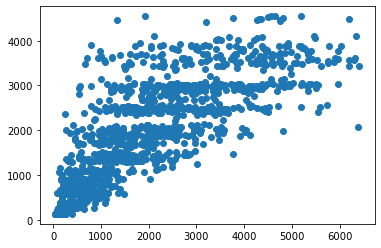

In [74]:
plt.scatter(y_val,predictions1)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

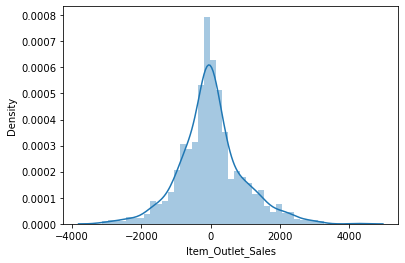

In [75]:
sns.distplot((y_val-predictions1))

In [76]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions1))

Mean Absolute Error:  668.2899451557546
Mean Squared Error:  858149.5167220113
Root Mean Squared Error:  926.3635985518922
Explained Variance Score:  0.5947292193911304


## XGBoost:

In [77]:
#Grid Search

# Create the parameter grid based on the results of random search 
param_grid = {
    #'bootstrap': [True],
    #'max_depth': range(1,15,1),
    #'min_samples_leaf': range(70,80,1),
    #'min_samples_split': [8, 10, 12],
    'n_estimators': range(100,500,100)
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = 4, verbose = 2,scoring='neg_mean_absolute_error')
# Fit the grid search to the data
grid_search.fit(x, y)

grid_search.best_params_,grid_search.best_score_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


({'n_estimators': 300}, -751.7579478833662)

In [78]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost.sklearn import XGBRegressor
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [80]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=x,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          learning_rate =0.1,
                          n_estimators=41,
                          max_depth=3,
                          min_child_weight=5,
                          gamma=0,
                          subsample=0.75,
                          colsample_bytree=0.95,
                          nthread=4,
                          scale_pos_weight=1,
                          reg_alpha=0.021,
                          seed=42,
                          )
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.95,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=41, n_jobs=4,
             nthread=4, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0.021, ...)

In [81]:
predictions2 = xg_reg.predict(x_val)

In [82]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions2))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions2))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions2)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions2))

Mean Absolute Error:  668.193698634837
Mean Squared Error:  852794.2650041409
Root Mean Squared Error:  923.4686053159256
Explained Variance Score:  0.5979571564007183


In [83]:
from sklearn.model_selection import GridSearchCV
  
#Tune max_depth and min_child_weight
param_test1 = {
 'max_depth':range(2,4,1),
 'min_child_weight':range(3,6,1)
}

gsearch1 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test1, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4, cv=10)
gsearch1.fit(x,y)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 5}, -710.1193023459841)

In [84]:
#Tuning Gamma
param_test2 = {
 'gamma':[i/10.0 for i in range(0,10)]
}

gsearch2 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test2, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4, cv=10)

gsearch2.fit(x,y)
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, -710.1193023459841)

In [85]:
#Tune subsample and colsample_bytree
param_test3 = {
 'subsample':[i/100.0 for i in range(75,100,5)],
 'colsample_bytree':[i/100.0 for i in range(75,100,5)]
}

gsearch3 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test3, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4, cv=10)
gsearch3.fit(x,y)
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.8}, -709.2011113154713)

In [86]:
# Tuning Regularization Parameters
param_test4 = {
 'reg_alpha':[0.011,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.019,0.02,0.021,0.022,0.023,0.24,0.025,0.026]
}
gsearch4 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test4, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4, cv=10)
gsearch4.fit(x,y)
gsearch4.best_params_, gsearch4.best_score_

({'reg_alpha': 0.02}, -710.1193016911259)

In [87]:
# Tuning No. of trees
param_test5 = {
 'n_estimators':range(30,50,1)
}
gsearch5 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test5, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4, cv=10)
gsearch5.fit(x,y)
gsearch5.best_params_, gsearch5.best_score_

({'n_estimators': 43}, -710.047216878462)

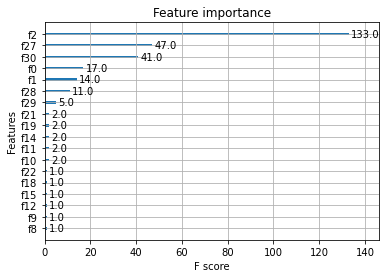

In [88]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [6, 8]
plt.show()